<a href="https://colab.research.google.com/github/geoffrey-lawhorn/Portfolio/blob/main/FDS_Project_Lawhorn_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# read the data
path = '/content/drive/MyDrive/MIT Course/Pre-Work/FoodHub/'
df = pd.read_csv(path + 'foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

#### Observations:

*   The DataFrame has 9 columns as mentioned in the Data Dictionary
*   Data in each row corresponds to the order placed by a customer.
*   Unique Identifiers for unique order and unique customer
*   No unique identifier for restaurant - identified through restaurant_name variable
*   'day_of_week' column holds two possible values of "weekday" and "weekend"
*   Values will need to be imputed for rating to remove character entries and simply replace with N/A values
*   Numeric representations for 'Cost', 'Food_Preparation_Time', and 'Delivery_Time'
*   Unique identifers, although numeric, should be transformed to categorical
*   Should be noted that there is no datetime component used in this dataset.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
*   1,898 orders are representated within this dataset
*   As noted above, there is no datetime component represented in this dataset so (with the given data) it is not possible to understand characters such as time of day, month, or year.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   We have a total of 1,898 rows. Each column has 1,898 non-null values meaning no imputation of missing or null values will need to occur.
*   Food_Preparation_Time and Delivery_Time are integers showing that we likely have information down to the minute level
*   As noted above, rating should be a numeric value. This is an object (as shown above) due to text values that should be imputed to null or N/A values
*   Unique identifiers should be cast as categorical variables seeing as their numeric quantities do not represent magnitude (could be just a personal preference).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here - There are no missing values as shown in the info read-out above
# We do however need to
#   1. Impute both unique identifers (for order and customer) to strings/objects
#   2. Impute 'Rating Not Given' entries for 'Rating' to N/A and case as an int64

# First create a copy of the dataset so that we don't overwrite the original
fhub = df.copy()
fhub['order_id'] = fhub['order_id'].astype(str)
fhub['customer_id'] = fhub['customer_id'].astype(str)
fhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


In [ ]:
# fhub['rating'].unique()
# fhub['rating'] = fhub['rating'].replace('Not given', '')
fhub['rating'] = pd.to_numeric(fhub['rating'], errors='coerce')
# fhub['rating'].unique()
# fhub.info()
fhub.rating = fhub.rating.fillna(0)
fhub.rating = fhub.rating.astype(int)
fhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 133.6+ KB


#### Observations:
*   There are no missing values as shows in the readout above
*   We do however need to:
   1. Impute both unique identifers (for order and customer) to strings/objects.
   2. Create new column to impute 'Rating Not Given' entries for 'Rating' to 0 and case as an int64

#### Question 3 Answer
While there are not missing values within the dataset, there are areas that can be addressed to make the data more useable. Those two areas are casting the unique identifiers to categorical variables and casting the rating variable to numeric ('Not Given' imputed to zero).

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
fhub.describe().T

min_str = "The minimum amount of time it takes for an order to be prepared once an order is placed is"
print(min_str, np.min(fhub.food_preparation_time), "minutes")

avg_str = "The average amount of time it takes for an order to be prepared once an order is placed is"
print(avg_str, round(np.mean(fhub.food_preparation_time), 2), "minutes")

max_str = "The maximum amount of time it takes for an order to be prepared once an order is placed is"
print(max_str, np.max(fhub.food_preparation_time), "minutes")

print(np.median(fhub.food_preparation_time))

The minimum amount of time it takes for an order to be prepared once an order is placed is 20 minutes
The average amount of time it takes for an order to be prepared once an order is placed is 27.37 minutes
The maximum amount of time it takes for an order to be prepared once an order is placed is 35 minutes
27.0


#### Observations:
*   Mean and Median are very close together meaning that this this is likely to be more normally distributed

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
rating_not_given = fhub[fhub['rating']==0].rating.count()

print("There were", rating_not_given, "orders that were not given a rating.")

There were 736 orders that were not given a rating.


#### Observations:
*   We determined the answer to this question above already and imputed to 0. So we will essentially want to count up all the zero values
*   There are 736 orders that were not given a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
# Write the code here
# Use the function that was specified in the uber case study to help with EDA
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

**Columns to Analyze Further**
*   Numeric
  *   Rating
  *   Cost_of_the_order
  *   Food_preparation_time
  *   Delivery_time
*   Categorical
  * Restaurant_Name
  * Cuisine_Type
  * Day_of_the_week
  * Customer_ID

Unnecessary to analyze order_id given that there should be a unique ID for each row.

In [ ]:
fhub.columns
# histogram_boxplot(fhub.cost_of_the_order)

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

**Observations on Order Cost**
*   Given that the median is below the mean, this implies that the distribution is right-skewed
*   Highest count of deliveries are in the 10-15 dollar range of values
*   Minimum amount is close to $5
*   Sparcity of data in some of the upper areas of the distribution


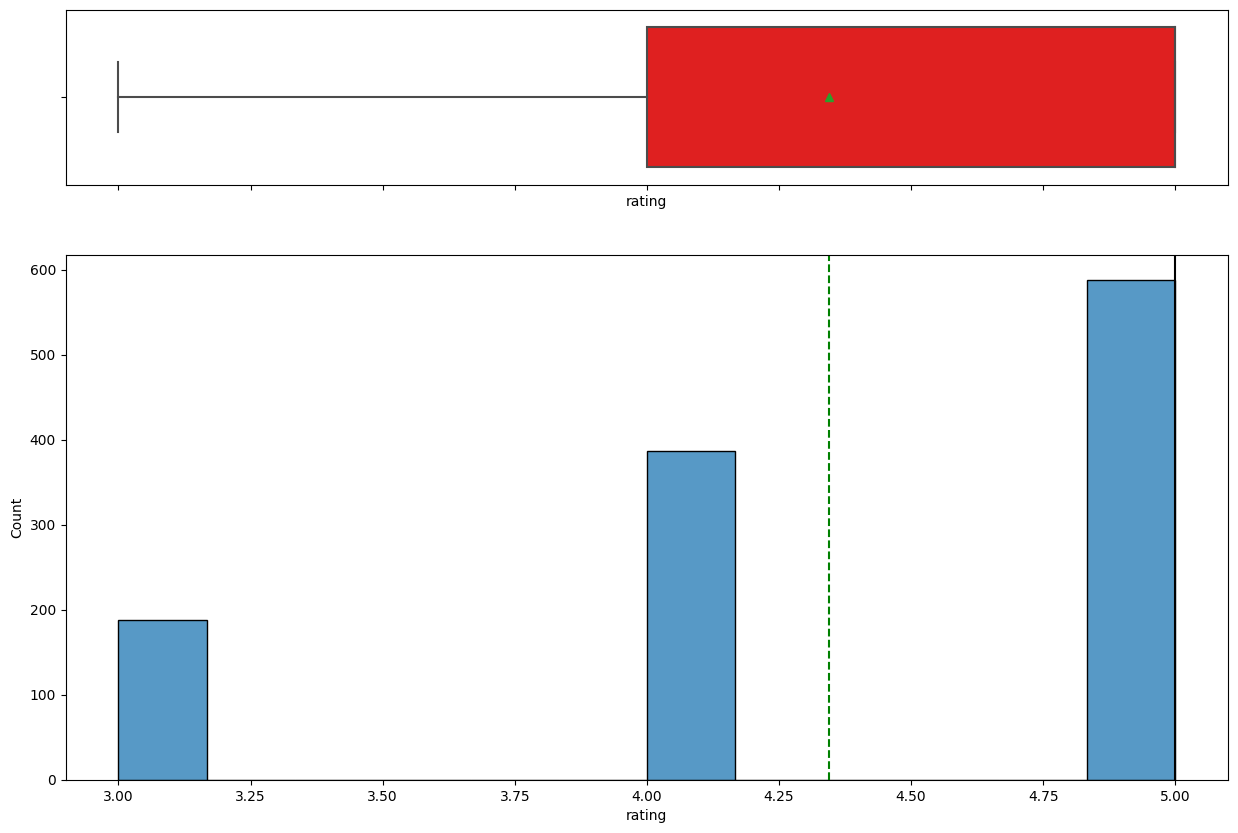

In [ ]:
# fhub.columns
histogram_boxplot(fhub[fhub['rating'] > 0].rating)

**Rating Observations (removing zeros which represent orders in which a rating was not given)**
*   There is a fixed range of values between 3 and 5 - Range likely in the context of 'stars' and extends down to 2 and 1 stars
*   These should be treated as discrete values given that there are only three unique whole number values (4 if counting the orders that did not receive ratings)
*   The largest category was 5 and the lowest was 3 indicating

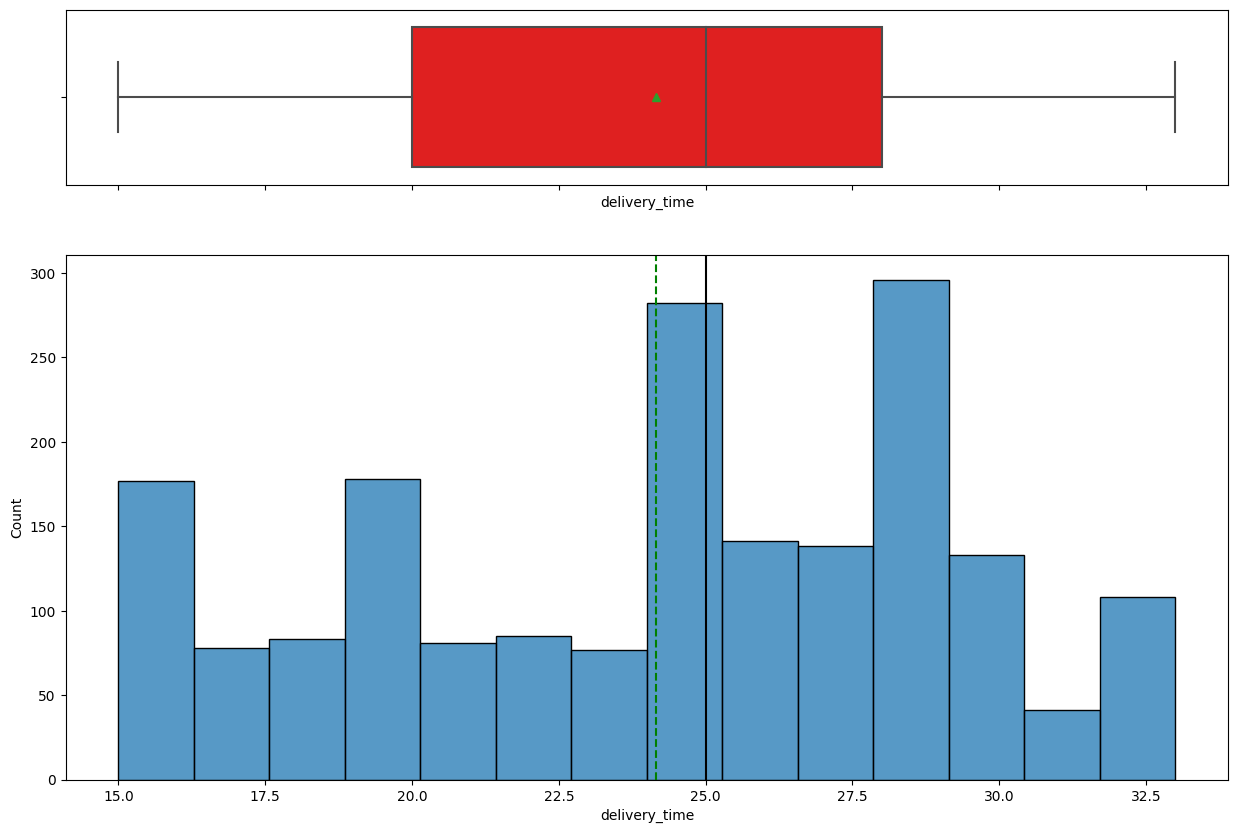

In [ ]:
# fhub.columns
histogram_boxplot(fhub.delivery_time)

**Observations on Delivery Time**
*   Median is close to the mean, but slightly above indicating slight left-skewness
*   Again, range looks to be set from 15 to roughly between 30 and 35 mins to deliver
*   No flagged outliers
---

Area of further research:
*   Including distance or some other proxy of how far (in distance) the restaurant is from the customer

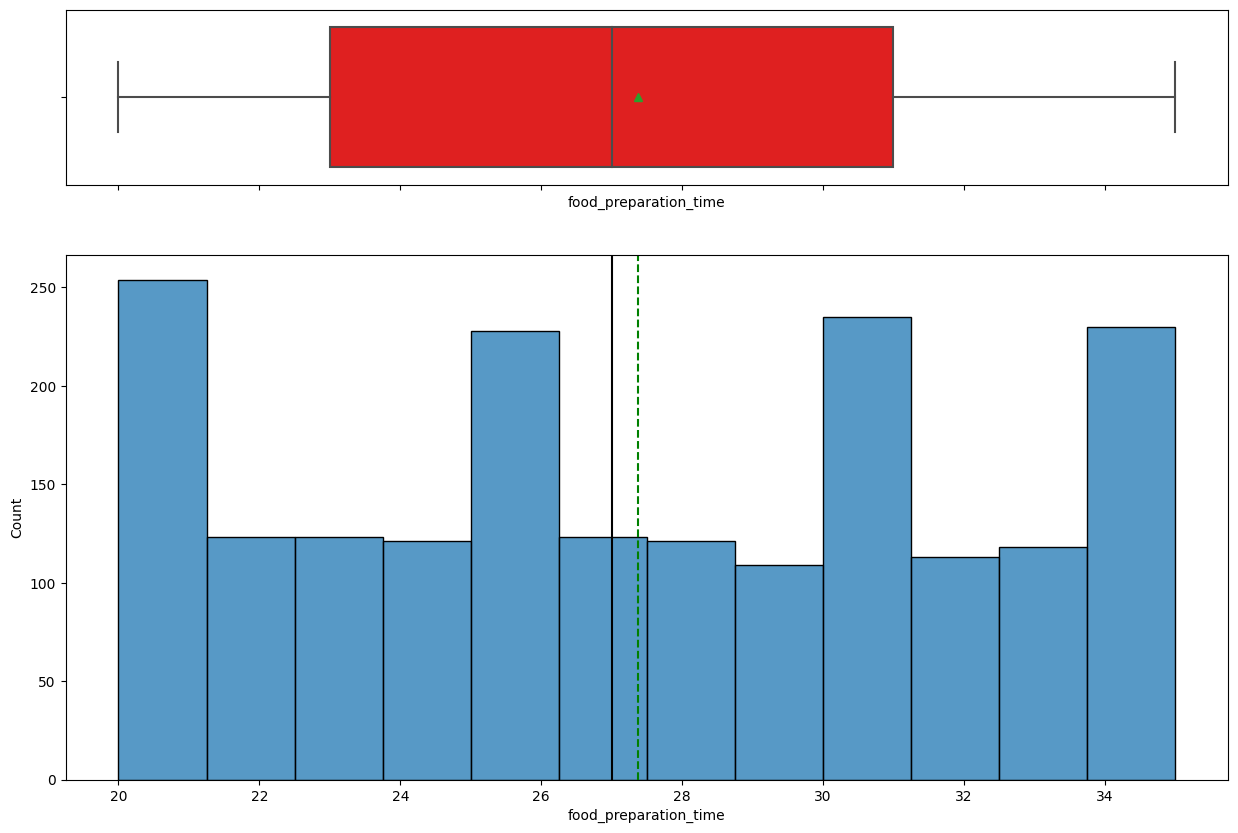

In [ ]:
# fhub.columns
histogram_boxplot(fhub.food_preparation_time)

**Observations for Food Preparation Time**
*   Median slightly below mean indicating slight right skew-ness
*   Food takes at least 20 minutes to make, but upwards of 30-35 mins
*   No flagged outliers

---
Area of further research:
*   Looking at total time instead of delivery and food preparation separately. Can do in this analysis rather simply.

In [ ]:
# Use the bar_perc function from the uber case study analysis
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()

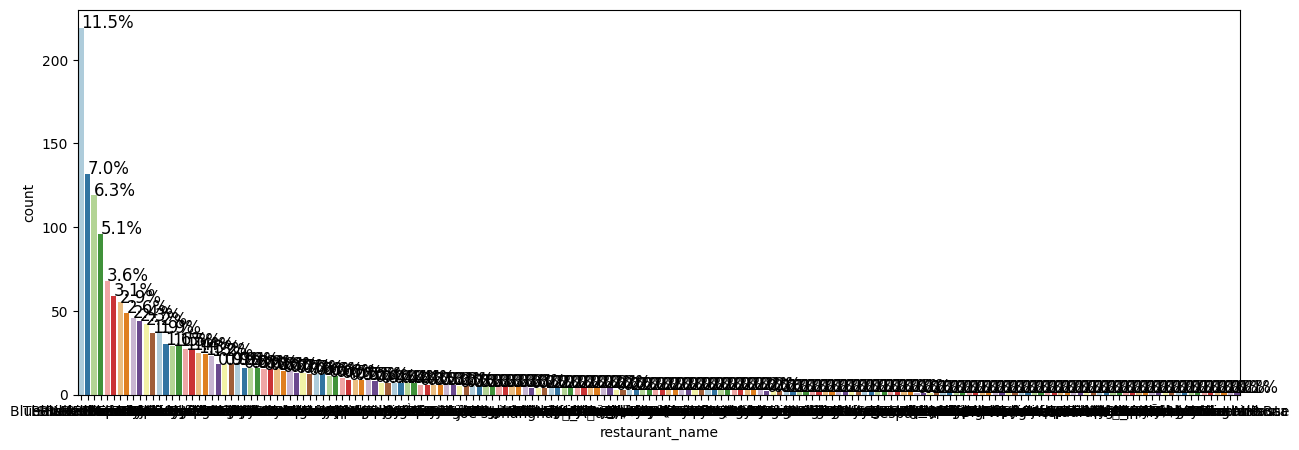

In [ ]:
# fhub.columns
bar_perc(fhub, 'restaurant_name')

**Observations for Restaurant Name**
*   Many options that FoodHub gives to its customers
*   Roughly 25-30% of orders come to 5 or 6 locations


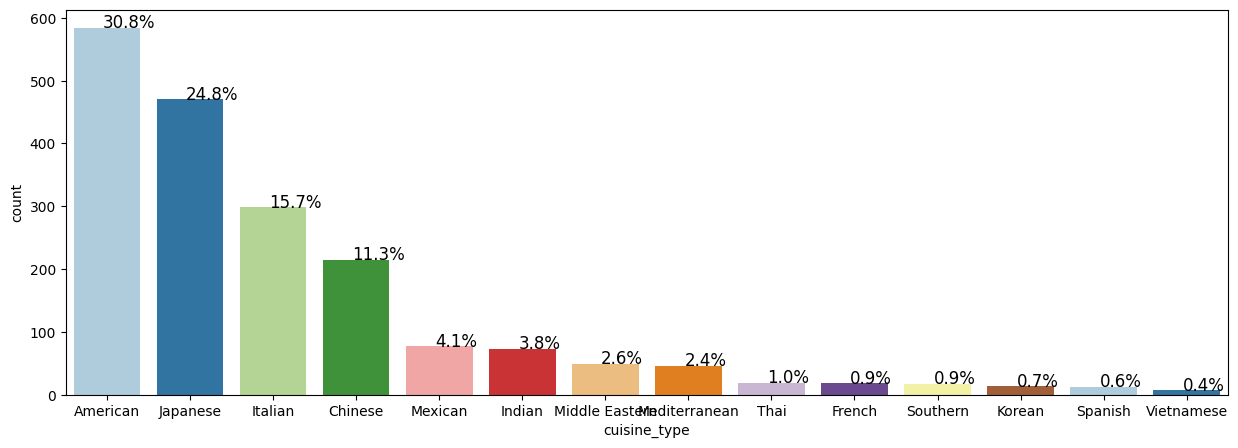

In [ ]:
# fhub.columns
bar_perc(fhub, 'cuisine_type')

**Observations for Cuisine**
*   Again, many options that FoodHub gives to its customers
*   Most popular is 'American'

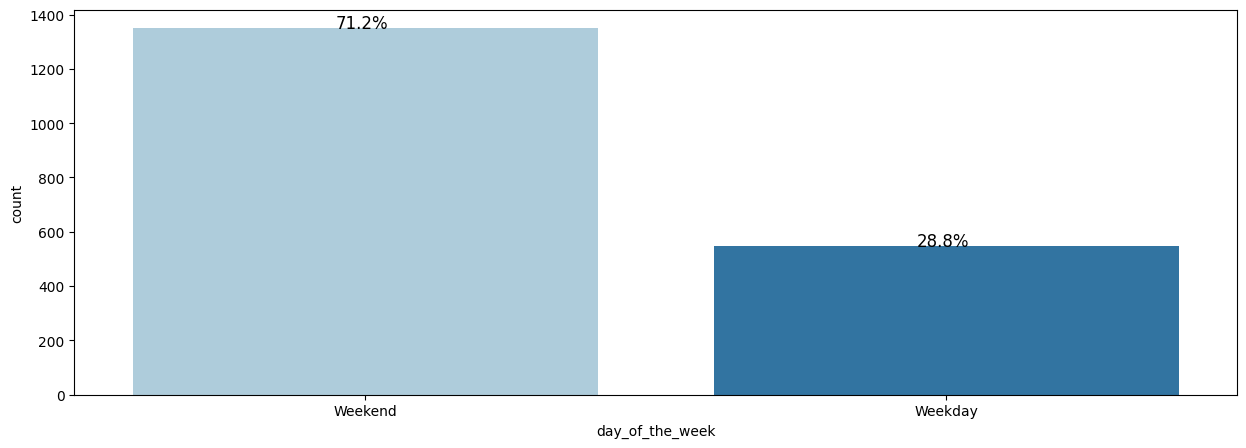

In [ ]:
# fhub.columns
bar_perc(fhub, 'day_of_the_week')

**Observations for Day of the Week**
*   Only two descriptors for the column - weekday and weekend
*   Vast majority of orders occur on the weekend
*   Given the high interest in ordering on the weekends, it would be interesting to understand further how many friday orders are contained in the weekday category given closeness to the weekend.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
fhub.restaurant_name.value_counts()[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
*   Top 5 restaurants are
  1. Shake Shack
  2. The Meatball Shop
  3. Blue Ribbon Sushi
  4. Blue Ribbon Fried Chicken
  5. Parm

* Two restaurants that begin with 'Blue Ribbon.' It would be interesting to understand if there is a connection between these two establishments

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
fhub[fhub['day_of_the_week']=="Weekend"].cuisine_type.value_counts()[0:5]

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
*   Top 5 Weekend Cuisine Types:
  1. American
  2. Japanese
  3. Italian
  4. Chinese
  5. Mexican
*   Large drop-off from Chinese to Mexican

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
orders_above_20 = len(fhub[fhub['cost_of_the_order'] > 20])
total_orders = len(fhub)
perc = format(orders_above_20 / total_orders, ".0%")
print("Percent of orders greater than $20 is", perc)

Percent of orders greater than $20 is 29%


#### Observations:
*   29% of observations had a total order greater than $20

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
mean_delivery_time = np.mean(fhub.delivery_time)
print("The average delivery time for an order is", round(mean_delivery_time, 1), "minutes.")

The average delivery time for an order is 24.2 minutes.


#### Observations:
*   Average time to deliver an order is roughly 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
top_3_customers = fhub.customer_id.value_counts()[0:3].astype(str)
print(top_3_customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: object


#### Observations:
*   The top 3 customers are '52832' (13 orders), '47440' (10 orders), and '83287' (9 orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Create a Heatmap to evaluate all numerics against one another

['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']


<Axes: >

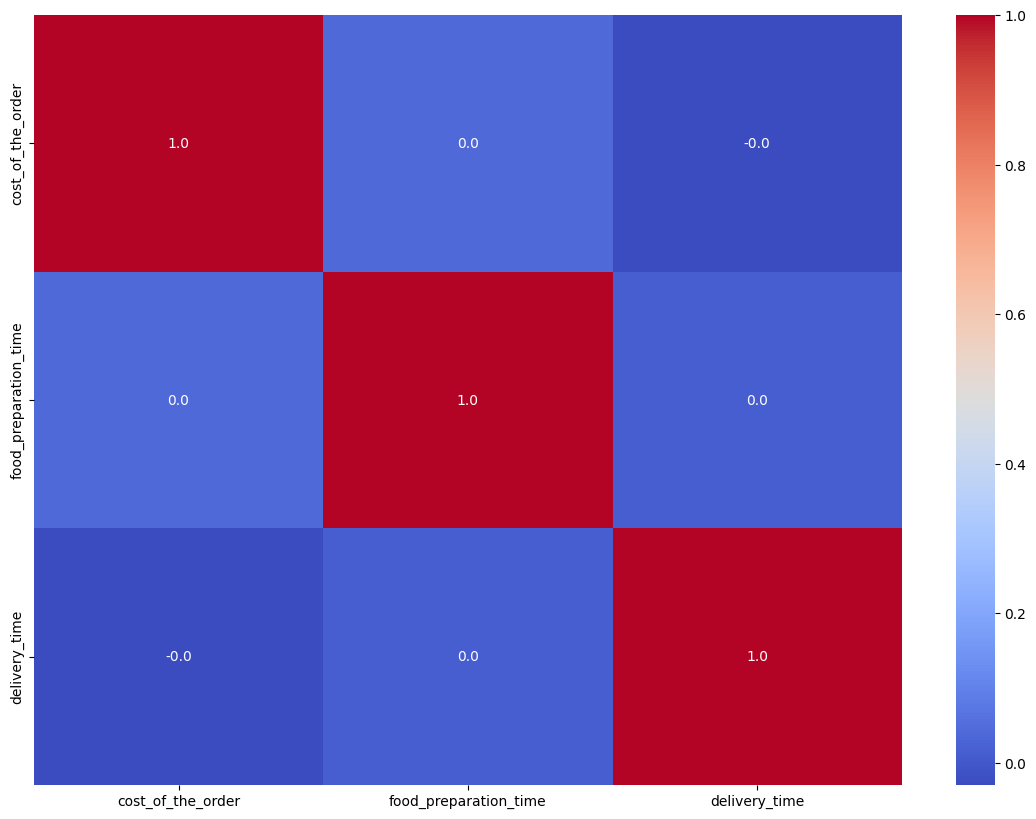

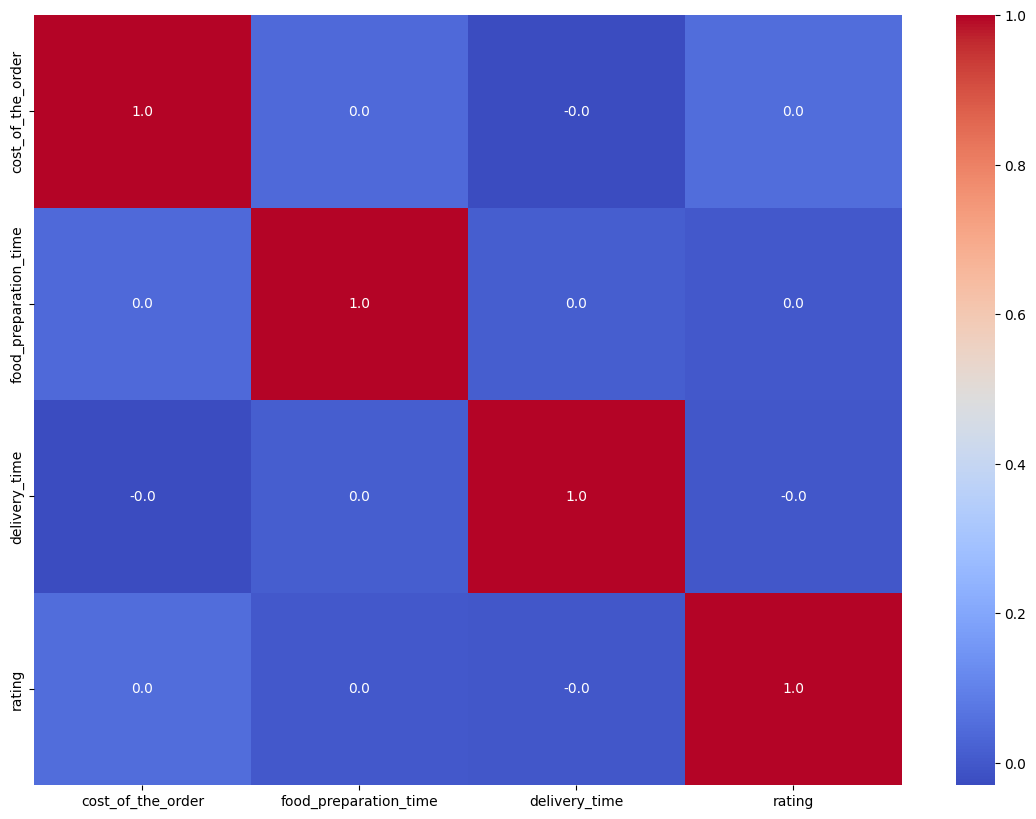

In [ ]:
# Write the code here
# fhub.columns

num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = fhub[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".1f",
            xticklabels = corr.columns, yticklabels = corr.columns)

num_var.append('rating')
print(num_var)
corr2 = fhub[num_var].corr()
# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr2, annot = True, cmap = 'coolwarm', fmt = ".1f",
           xticklabels = corr2.columns, yticklabels = corr2.columns)

**Observations**
There is no significant relationship between any of the numeric variables

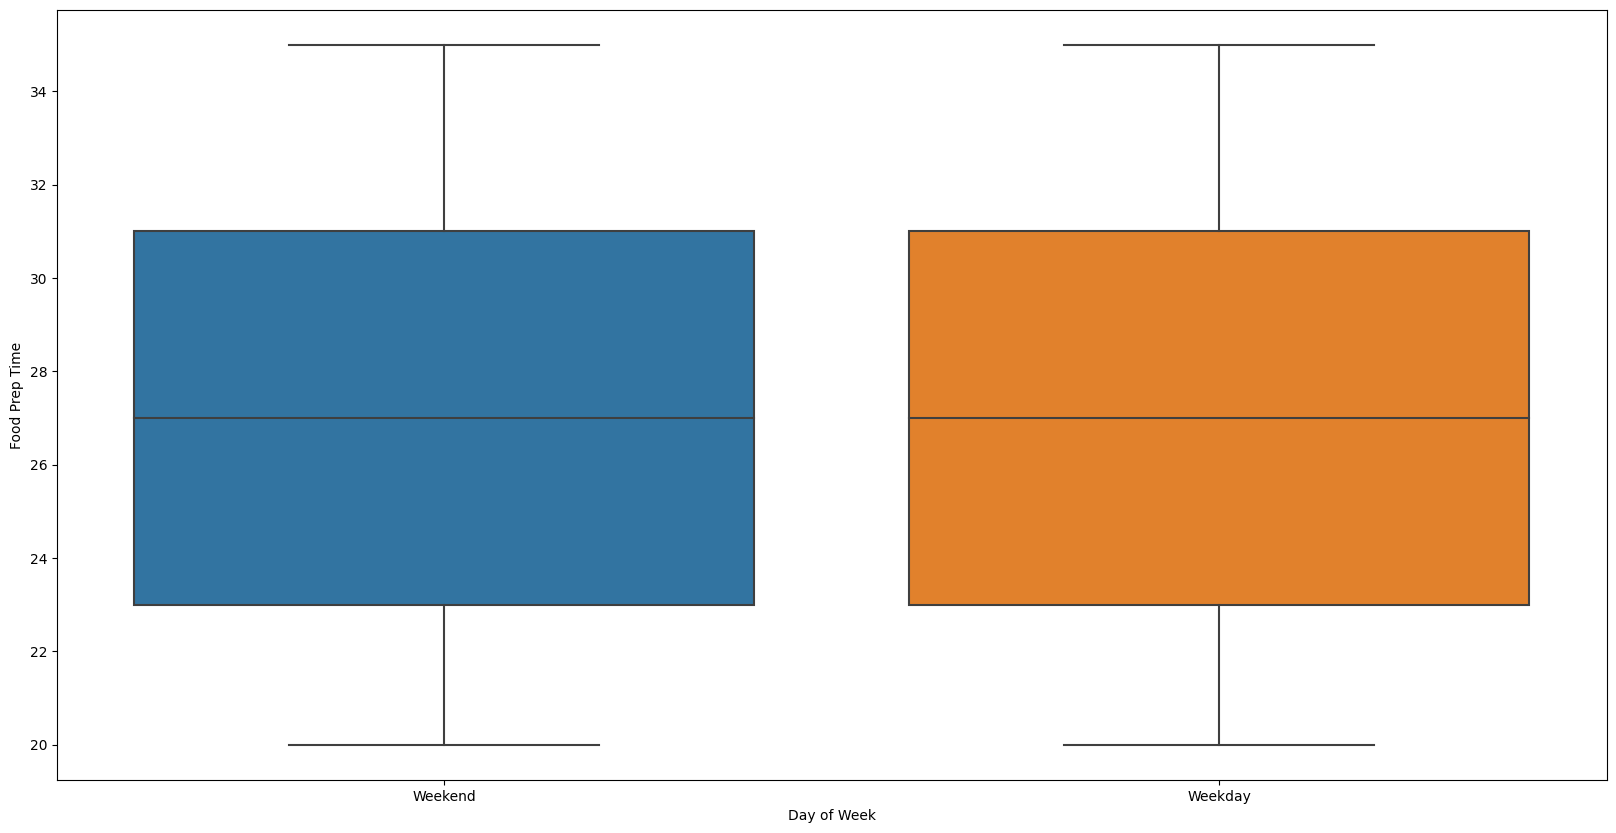

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.ylabel('Food Prep Time')
plt.xlabel('Day of Week')
plt.show()

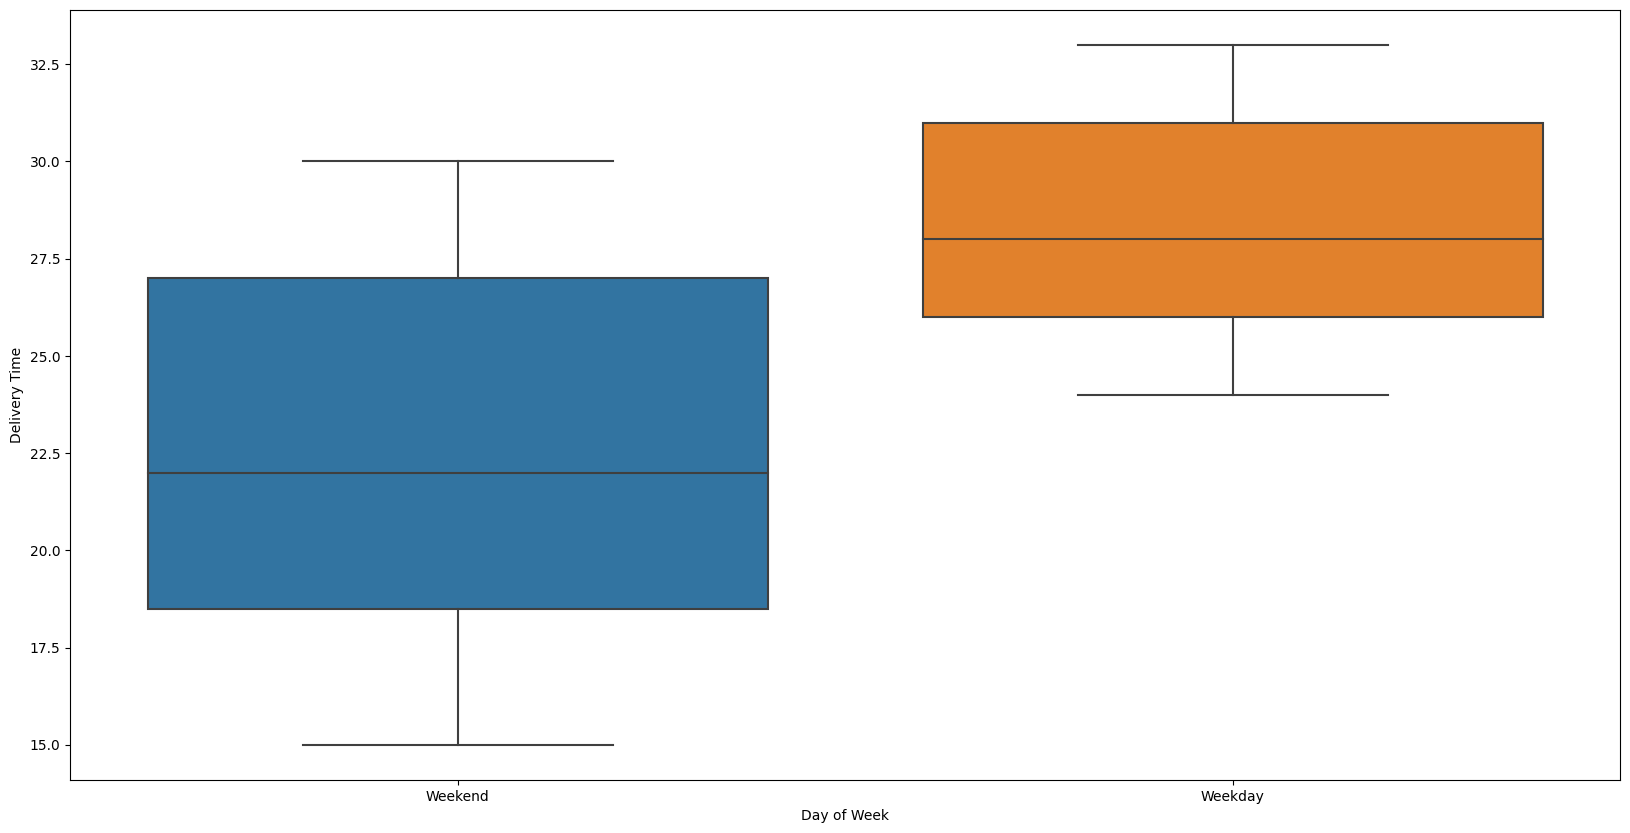

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.ylabel('Delivery Time')
plt.xlabel('Day of Week')
plt.show()

**Observations**
*   Delivery time is elevated during the week
  * This data could be coming from an area that sees an increase in traffic during the week, increasing delivery time, or an increase in the amount of distance a delivery must go

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [182]:
# Write the code here
fhub_summarize=fhub[fhub['rating'] > 0].groupby(['restaurant_name']).agg(Average_Rating=('rating','mean'),
                                                   Count=('restaurant_name','count')).reset_index()
fhub_summarize[(fhub_summarize['Average_Rating'] > 4) & (fhub_summarize['Count'] > 50)]

,restaurant_name,Average_Rating,Count
20,Blue Ribbon Fried Chicken,4.328125,64
21,Blue Ribbon Sushi,4.219178,73
136,Shake Shack,4.278195,133
153,The Meatball Shop,4.511905,84


#### Observations:
Restaurants fulfilling the criteria are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [190]:
# Write the code here
revenue_20_dollar_orders = round(fhub[fhub['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25, 2)
revenue_15_dollar_orders = round(fhub[(fhub['cost_of_the_order'] > 5) & (fhub['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15, 2)

total_revenue = round(revenue_20_dollar_orders + revenue_15_dollar_orders, 2)
print("Total revenue from $20 Orders:", revenue_20_dollar_orders,"\nTotal revenue from $15 Orders:", revenue_15_dollar_orders, "\nTotal Revenue:", total_revenue)

Total revenue from $20 Orders: 3688.73 
Total revenue from $15 Orders: 2477.58 
Total Revenue: 6166.31


#### Observations:
Total revenue based on the calculation is $6,166.31

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [224]:
# Write the code here
fhub.columns
fhub['Total_Time_From_Order'] = fhub['food_preparation_time'] + fhub['delivery_time']
x = fhub.groupby(['restaurant_name']).agg(Delivery_Time=('Total_Time_From_Order','mean')).reset_index()

x.sort_values(by=['Delivery_Time'])

# percentage = format(len(fhub[fhub['Total_Time_From_Order'] > 60]) / len(fhub), ".01%")
# print("The percent of orders that take longer than 60 mins are", percentage)

,restaurant_name,Delivery_Time
167,Wo Hop Restaurant,38.0
96,Market Table,38.0
61,Galli Restaurant,38.0
128,Samurai Mama,39.0
43,DespaÌ±a,40.0
...,...,...
17,Big Wong Restaurant _¤¾Ñ¼,62.0
140,Sushi Choshi,62.0
77,Il Bambino,63.0
39,Cipriani Le Specialita,65.0


#### Observations:
10.5% of observations take longer than 60 mins to receive by the customer.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [207]:
# Write the code here
fhub_summarize=fhub.groupby(['day_of_the_week']).agg(Delivery_Time=('delivery_time','mean')).reset_index()
print(fhub_summarize)

  day_of_the_week  Delivery_Time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:
The delivery time on the weekend takes approximately 6 mins less (on average) than it does during the week.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  While the data used is limited (there could be more context on location), there is heavy interest in American food on the weekend
*   The American food on the weekend comes (it appears) solely from Shake Shack, but other cuisines, such as Italian are popular too (in the form of Parm and The Meatball Shop).
*   Delivery time during the week is more meaning that there could be a shortage of delivery people during the week. These could be individuals that subsidize their income with running food orders on the weekends. Additional analysis would be needed to determine who exactly is performing delivery. Supporting this conclusion is the weekday information indicating that nearly 3/4 of deliveries occur on the weekend.
*   While there is a rating column in the dataset, it is not clear whether the rating is for the quality of delivery or the quality of the food (or both). This clarification is needed to understand exactly what the customer's experience was with FoodHub
*   10% of deliveries on the weekend take longer than 60 mins. Food delivery in general takes time (typically at least 40 mins). Efforts should be provided to reduce the right-tail of delivery time.

### Recommendations:

*   Again, while details and context are limited, FoodHub needs to expand into the weekday sales and grow their demand. Providing incentives on both the supply (delivery people) and demand (customer orders) can help to drive broader adoption during every day of the week. An additional analysis would be understand what marketing promotion would be best to pursue, and how that would affect revenue during the week.
*   There is heavy interest in 5-6 select restaurants. Providing special promotions (such as for first time users) for these restaurants can help to keep demand high while continuing to generate interest in the restaurants that are providing the majority of the revenue.
*   Additional analysis is needed on time of day, day of week, as well as other details such as weather and distance for delivery. This information should be collected and provided to run the analysis again and generate additional insights.

---